# Sentiment analysis with Logistic Regression

### Some plotting functions

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/logistic_regression

fatal: destination path 'machine_learning_1' already exists and is not an empty directory.
/content/machine_learning_1/logistic_regression


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils
import math

In [3]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

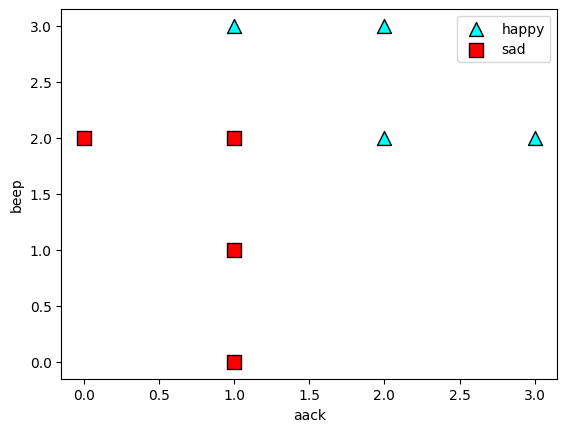

In [4]:
# Plotting the points
utils.plot_points(features, labels)

### Logistic regression

In [5]:
def sigmoid(x):
    ## TODO ##
    output = 1/(1+np.exp(-x))
    return output

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using sigmoid and score functions
    output= sigmoid(score(weights,bias,features,))
    return output

def log_loss(weights, bias, features, label):
    ## TODO ##
    # implement log_loss calculation using prediction function
    pred = prediction(weights,bias,features)
    output = -(label * (np.log(pred)) + (1-label)*np.log(1-pred))
    return output

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [6]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    pred = prediction(weights,bias,features)
    for i in range(len(weights)):
        weights[i]=weights[i]+(learning_rate*(label-pred)*features[i])
    bias = bias + (learning_rate*(label-pred))
    return weights, bias

In [7]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


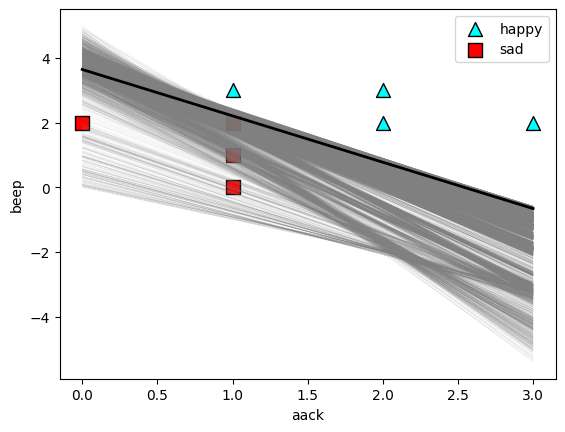

([2.2103421364599543, 1.5431610331956986], -5.619684941094322)

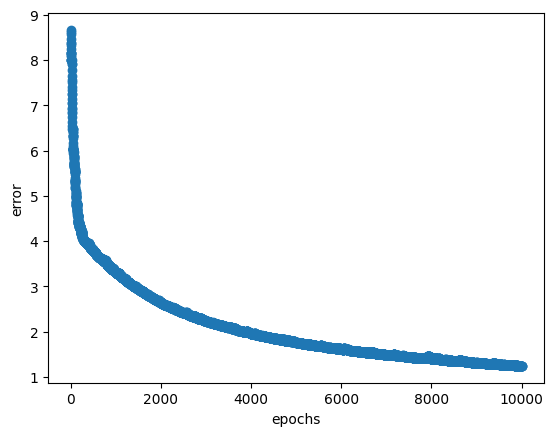

In [8]:
logistic_regression_algorithm(features, labels,epochs=10000)

# Logistic SKlearn

In [9]:
from sklearn.linear_model import SGDClassifier
## TODO ##
# use loss="log_loss",tol=None
clf= SGDClassifier(tol=None,loss="log_loss")
clf.fit(features,labels)

SGDClassifier(loss='log_loss', tol=None)

In [10]:
clf.score(features, labels)

1.0

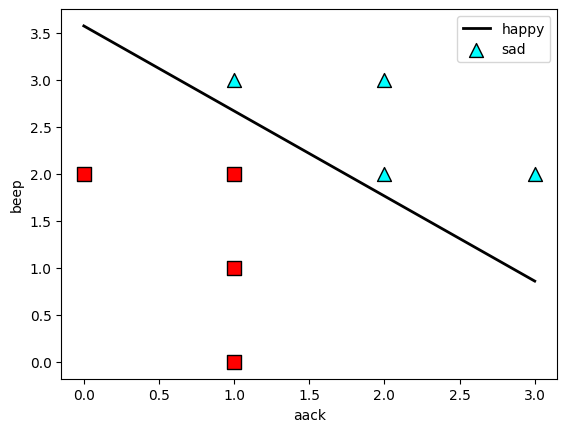

In [11]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()

### Real Example (Breast Cancer)

In [12]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [13]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [14]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

In [15]:
dataset = pd.read_csv(url, names=column_names)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset = dataset.drop(train_dataset.index)
# The `id` column can be dropped since each row is unique
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In [17]:
y_train, y_test = y_train.map({'B': 0, 'M': 1}), y_test.map({'B': 0, 'M': 1})

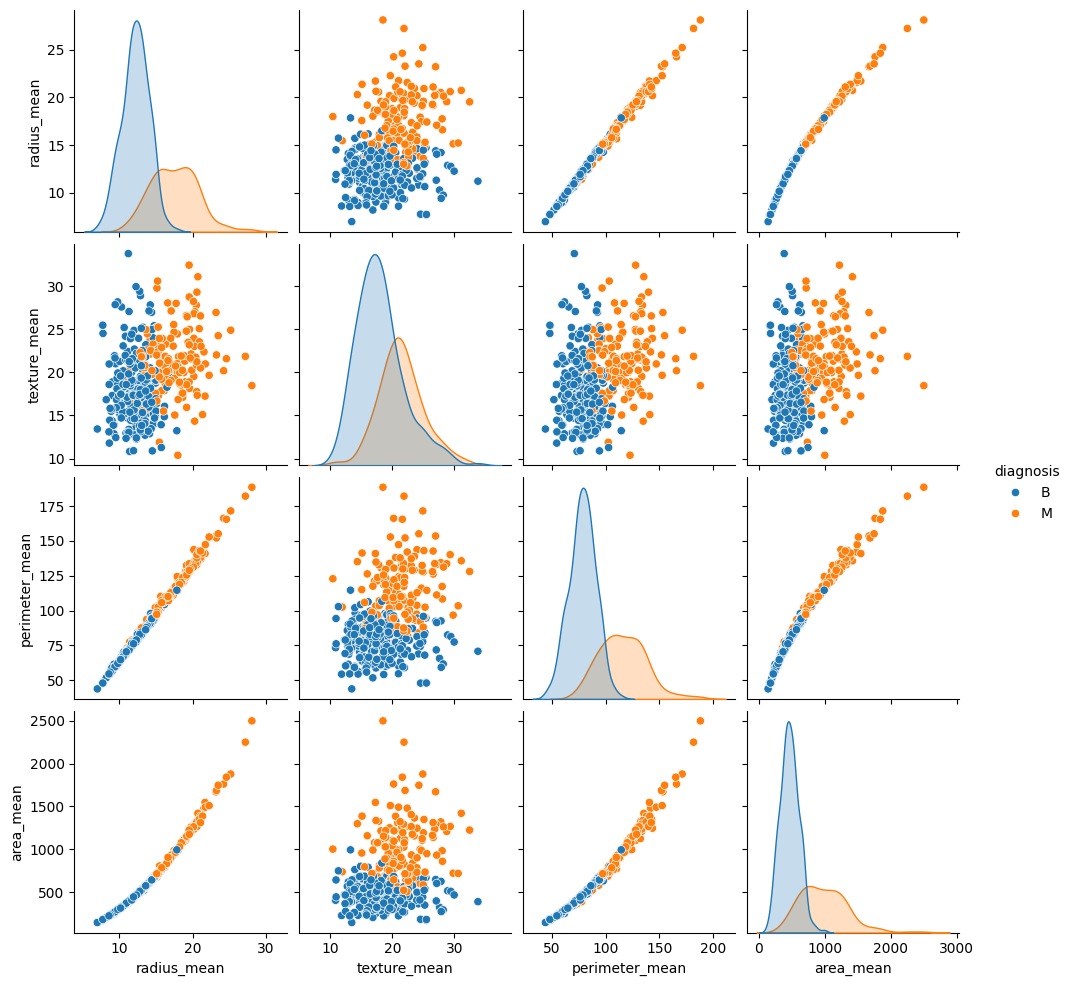

In [18]:
sns.pairplot(train_dataset.iloc[:, 1:6], hue = 'diagnosis');

In [19]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,symmetry_mean,fractal_dimension_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.1312,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.1786,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.1483,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165


In [20]:
# use only "radius_mean" feature
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log_loss",tol=None,eta0=0.1)
clf.fit(x_train.iloc[:, 1:2],y_train)
clf.score(x_test.iloc[:, 1:2],y_test)


0.676056338028169

In [21]:
# use all data
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log_loss",tol=None,eta0=0.01)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9084507042253521

In [22]:
# use all data with standard scaler
# Fit the scaler on training data only
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)
clf = SGDClassifier(loss="log_loss",tol=None,eta0=0.1)
clf.fit(x_train_scaled,y_train)
clf.score(x_test_scaled,y_test)

0.971830985915493